In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from ephys.ratEphysFunctions import *
import scipy.io as sio

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
np.random.seed(0)

In [2]:
brain_area = 'all'
experimentor = ''
file_name = 'mats/'+experimentor+'SGD_session_table_target_'+brain_area+'.mat'
session_table = sio.loadmat(file_name)['SGD_table']

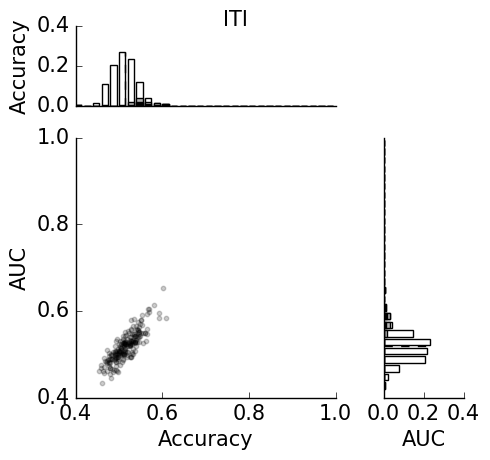

In [3]:
run_AUC_scatter_histogram(session_table,0,target=True)

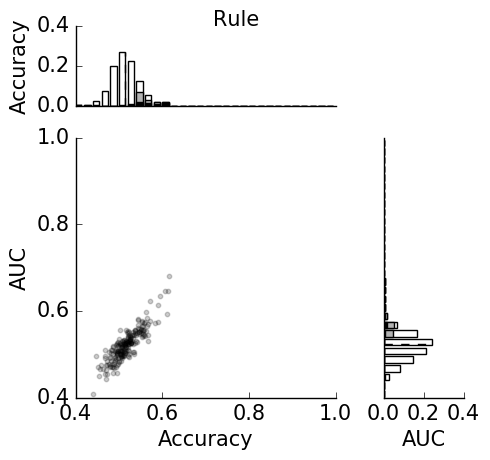

In [5]:
run_AUC_scatter_histogram(session_table,1,target=True)

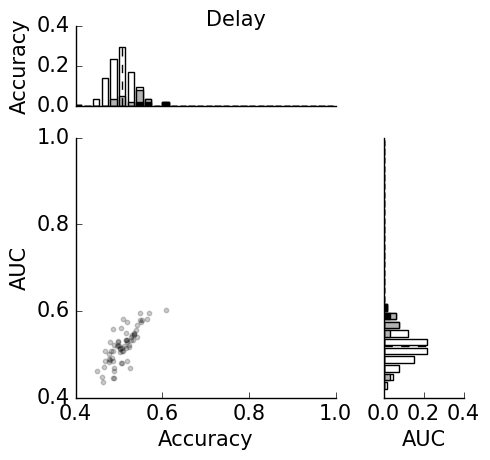

In [6]:
run_AUC_scatter_histogram(session_table,2,target=True)

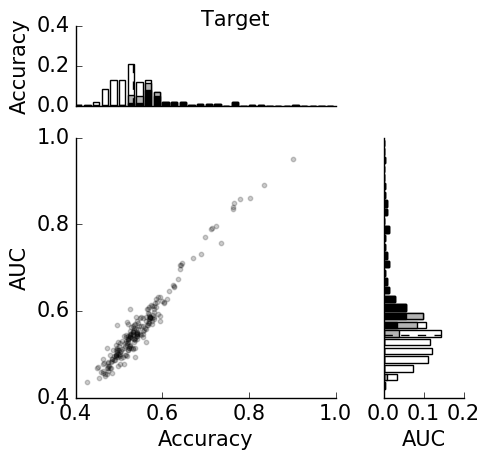

In [7]:
run_AUC_scatter_histogram(session_table,3,target=True)

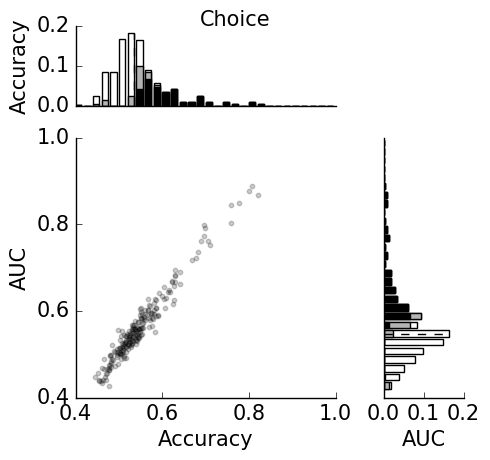

In [8]:
run_AUC_scatter_histogram(session_table,4,target=True)

In [9]:
single_AUC_p = sio.loadmat('mats/'+experimentor+'single_AUC_p.mat')['single_AUC_p'] #ITI_AUC, ITI_p, ...., choice_AUC, choice_p
single_AUC_p_target = sio.loadmat('mats/Duan_single_target_AUC_p.mat')['single_AUC_p'] #ITI_AUC, ITI_p, ...., choice_AUC, choice_p
pro_selective = load_weights("pkls/pro_selective-0.85.pkl")
anti_selective = load_weights("pkls/anti_selective-0.85.pkl")
left_selective = load_weights("pkls/left_selective-0.85.pkl")
right_selective = load_weights("pkls/right_selective-0.85.pkl")

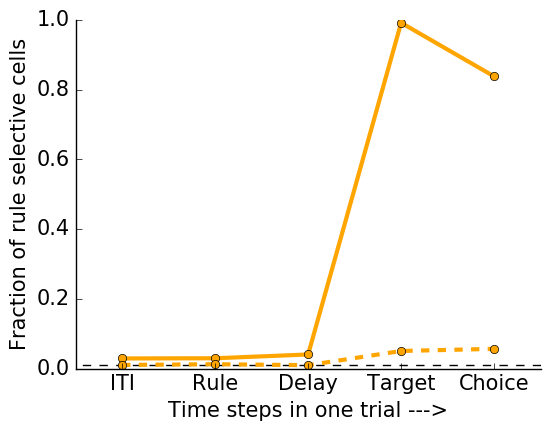

In [10]:
fraction_significant_cell(single_AUC_p_target, right_selective, left_selective)

ephys/ratEphysFunctions.py:1064: RuntimeWarning: invalid value encountered in less_equal
  significant_fraction.append(np.mean(single_AUC_p[:,2*t+1]<=threshold))


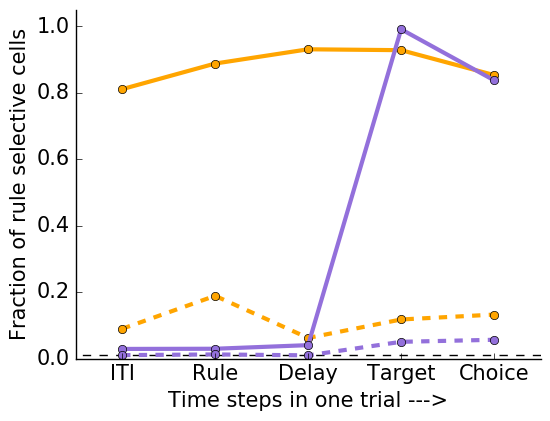

In [11]:
fraction_significant_cell_combined(single_AUC_p, single_AUC_p_target, pro_selective, 
    anti_selective, right_selective, left_selective, filename = "figures/selective_neurons.pdf")
#fraction_significant_cell_combined(single_AUC_p, single_AUC_p_target, pro_selective, 
#    anti_selective, right_selective, left_selective)

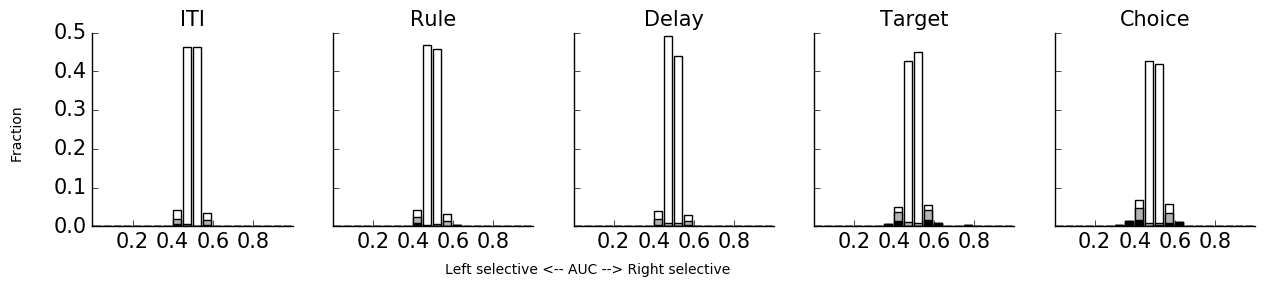

In [12]:
single_neuron_AUC(single_AUC_p_target,save=True, target=True, ymax=0.5)

In [13]:
auc = load_weights("pkls/auc_target-0.85.pkl")
significant = load_weights("pkls/auc_significant_target-0.85.pkl")
CellIndexPerSession = sio.loadmat('mats/CellIndexPerSession.mat')['CellIndexPerSession'][0,:]
flip_fraction_RNN = flip_neurons_RNN(auc, significant)
num_session = np.unique(session_table[:,0]).size
fraction_flip_per_session = flip_neurons(single_AUC_p, CellIndexPerSession, num_session, threshold = 0.01)

ephys/ratEphysFunctions.py:497: RuntimeWarning: invalid value encountered in greater
  auc[p_values>threshold] = 0.5
ephys/ratEphysFunctions.py:498: RuntimeWarning: invalid value encountered in less
  auc_flip_matrix = ((auc[:,0:-1]-0.5) * (auc[:,1:]-0.5)<0).astype(float)
ephys/ratEphysFunctions.py:499: RuntimeWarning: invalid value encountered in less_equal
  significant_matrix = np.logical_and(p_values[:,0:-1]<=threshold,p_values[:,1:]<=threshold)


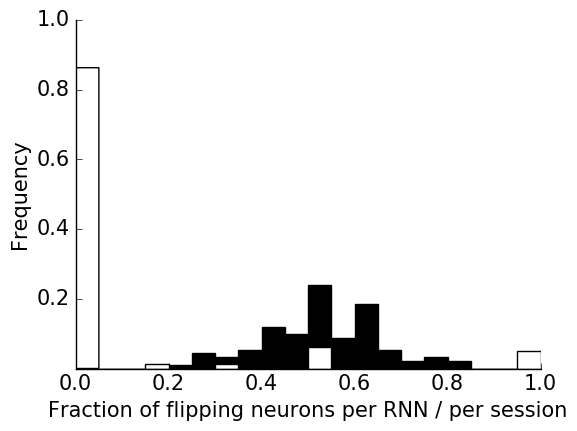

In [15]:
AUC_flip_histogram(flip_fraction_RNN, fraction_flip_per_session, filename = "figures/target_flipping_combine.pdf")
#AUC_flip_histogram(flip_fraction_RNN, fraction_flip_per_session)

In [16]:
fitted_tables = []
for t in range(5):
    fitted_tables.append(\
        sio.loadmat('mats/'+experimentor+'SGD_table_target_'+str(t)+'_'+brain_area+'.mat')['SGD_matrix'+str(t)])
#{'sessid','pro','right','switches','hit','ratindex',...
#    'score0','score1','score2','score3','score4',...
#    'accuracy0','accuracy1','accuracy2','accuracy3','accuracy4',...
#    'encoding0','encoding1','encoding2','encoding3','encoding4','real_encoding',fit',CI[0],CI[1]})

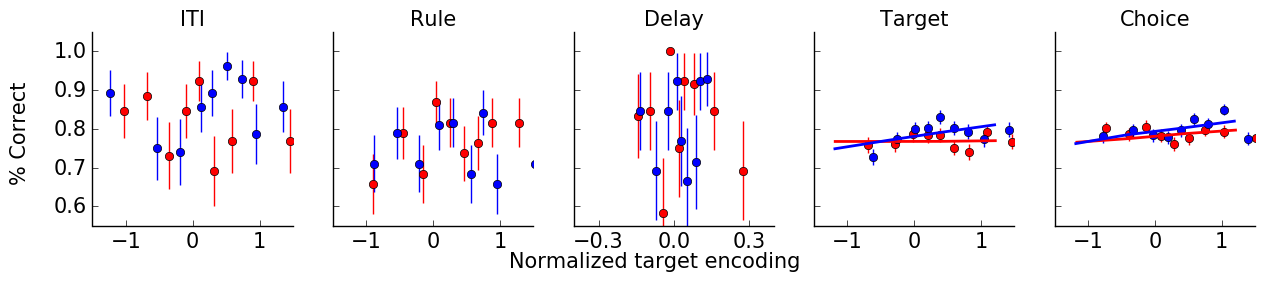

In [26]:
plot_steps = [3,4] # Only plot significant steps
plot_bins(fitted_tables,plot_steps, bins=10, bins_fit=5, target = True,filename = "figures/ratNormalizedTargetfitted.pdf")
#plot_bins(fitted_tables,plot_steps, bins=10, bins_fit=5, target = True, filename = None)

time step 0
0 sessions considered.
The mean normalized encoding score of switch trials is nan, block trials is nan
The p value between switch and block trials is nan
time step 1
0 sessions considered.
The mean normalized encoding score of switch trials is nan, block trials is nan
The p value between switch and block trials is nan
time step 2
1 sessions considered.
The mean normalized encoding score of switch trials is 0.000094, block trials is 0.086472
The p value between switch and block trials is nan
time step 3
15 sessions considered.
The mean normalized encoding score of switch trials is 0.259571, block trials is 0.368249
The p value between switch and block trials is 0.039606
time step 4
18 sessions considered.
The mean normalized encoding score of switch trials is 0.168692, block trials is 0.327247
The p value between switch and block trials is 0.091433


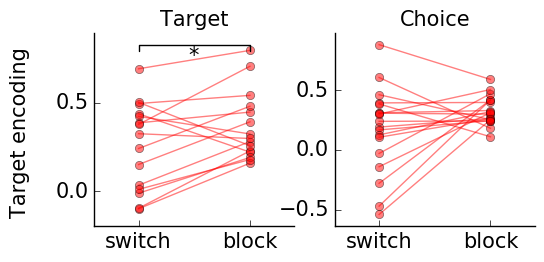

time step 0
1 sessions considered.
The mean normalized encoding score of switch trials is 0.301816, block trials is 0.109222
The p value between switch and block trials is nan
time step 1
0 sessions considered.
The mean normalized encoding score of switch trials is nan, block trials is nan
The p value between switch and block trials is nan
time step 2
1 sessions considered.
The mean normalized encoding score of switch trials is -0.002540, block trials is 0.080424
The p value between switch and block trials is nan
time step 3
15 sessions considered.
The mean normalized encoding score of switch trials is 0.414126, block trials is 0.383406
The p value between switch and block trials is 0.742194
time step 4
22 sessions considered.
The mean normalized encoding score of switch trials is 0.254858, block trials is 0.340183
The p value between switch and block trials is 0.368200


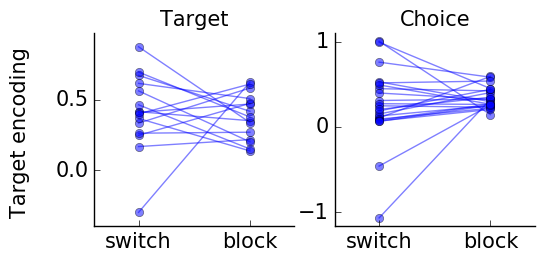

In [28]:
#encoding_score_parallel_plot(fitted_tables, "right", minimum_trial = 4, filename = "figures/ratRightScore.pdf")
#encoding_score_parallel_plot(fitted_tables, "left", minimum_trial = 4, filename = "figures/ratLeftScore.pdf")
encoding_score_parallel_plot(fitted_tables, "right",minimum_trial = 4, message=True)
encoding_score_parallel_plot(fitted_tables, "left",minimum_trial = 4, message=True)